In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_data(size=10_000):
#Create a dataframe
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0,9, size)
    df["pct_sleep"] = np.random.rand(size)
    df['favourite_food'] = np.random.choice(['pizza', "taco", "stir fry"], size)
    df['hate_food'] = np.random.choice(["broccoli", "carrots", "spinach"], size)
    return df

In [3]:
get_data()

,age,time_in_bed,pct_sleep,favourite_food,hate_food
0,69,8,0.665166,stir fry,spinach
1,39,5,0.540535,stir fry,broccoli
2,0,7,0.061207,taco,carrots
3,80,3,0.749281,pizza,carrots
4,88,4,0.566456,stir fry,carrots
...,...,...,...,...,...
9995,59,1,0.429232,stir fry,broccoli
9996,64,2,0.558616,pizza,spinach
9997,53,6,0.384832,taco,spinach
9998,42,6,0.714458,stir fry,broccoli


# Define the problem
- If person spends more than 5 hours in bed and is asleep for more than 50% of the time, then give a choice of favourite food.
- Otherwise, give a choice of hate food.
- If over 90, give favourite food.

In [4]:
def reward_calc(row):
    if row['age'] >= 90:
        return row["favourite_food"]
    if (row['time_in_bed'] > 5) & (row['pct_sleep'] > 0.5):
        return row["favourite_food"]
    return row['hate_food']


#### Let's look through different ways to apply this function to our dataframe

### Level 1 - loop

In [5]:
%%timeit
df = get_data()
for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_calc(row)

718 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Level 2: Use apply

In [6]:
%%timeit
df = get_data()
df['reward'] = df.apply(reward_calc, axis=1)

84 ms ± 503 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Level 3 - vectorised code

In [11]:
df = get_data()

In [12]:
%%timeit

df['reward'] = df['hate_food']
df.loc[((df['pct_sleep'] > 0.5) 
        & (df['time_in_bed'] > 5)) 
       | (df['age'] >= 90), "reward"] = df['favourite_food']

696 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Plot differences

In [15]:
results = pd.DataFrame(
    [["loop", 3580, 48.3],
     ["apply", 392, 6.5],
     ["vectorized", 1.5, 0.02]
    ],
    columns=["type", "mean", "std"]
)

In [16]:
print(results)

         type    mean    std
0        loop  3580.0  48.30
1       apply   392.0   6.50
2  vectorized     1.5   0.02


<AxesSubplot: ylabel='type'>

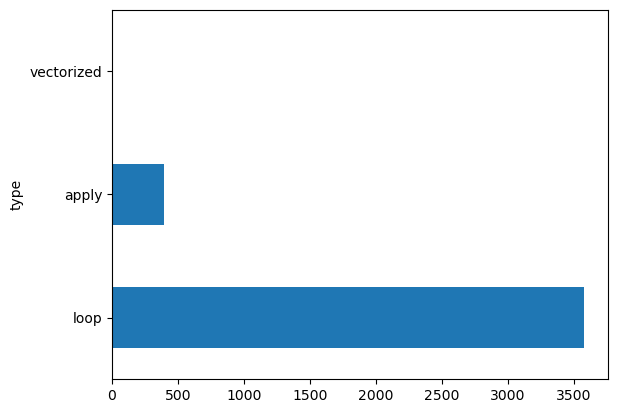

In [26]:
results.set_index("type")["mean"].plot(kind="barh")